In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Matrix generator
import random
def T_generator():
    s = np.random.randint(1,900,size=(5))
    s = s/100
    s = s/np.sum(s)
    s1 = np.zeros((500,500))
    for k in range(500):
        j=0
        for i in random.sample(range(0,500),5):
            s1[k][i] = s[j]
            j+=1
    return s1

In [ ]:
# T = np.matrix([[0.4,0.6,0,0,0],[1/3,1/3,0,1/3,0],[0.8,0,0.1,0.1,0],[0,0,0,0,1],[0,0.7,0.3,0,0]])
# P = P_updated = np.matrix([[0.56],[0.32],[0.66],[0.01],[0.8]])
T = np.matrix(T_generator())
P = random.sample(range(1,501),500)
P = np.matrix(P)/500
P = P_updated = P.reshape(500,1)
outputs = [P]
norm_output = []
i=0
consensus = False
while((consensus==False) and (i<1000)):
    P = P_updated
    P_updated = T*P_updated
    outputs.append(P_updated)
    P_bar = np.mean(P_updated)
    P_diff = P_updated - P_bar
    P_norm = np.linalg.norm(P_diff)
#     outputs.append(P_updated)
#     print(P_updated)
    norm_output.append(P_norm)
    if (np.all(P - P_updated < np.full(len(P_updated),1e-10))):
        consensus = True
    i+=1
print(np.shape(outputs))
print(norm_output)

## Plot using Norm

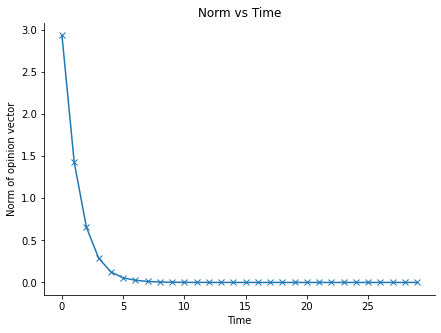

In [ ]:
fig = plt.figure(figsize=(7,5))
X = [j for j in range(len(norm_output))]
plt.plot(X,norm_output,marker = 'x')
plt.xticks(range(0,len(X),5))
plt.title("Norm vs Time")
plt.xlabel("Time")
plt.ylabel("Norm of opinion vector")
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.show()

## Dataframe and plotting
- Plot of all 500 users

In [ ]:
import pandas as pd
outputs = np.array(outputs)
outputs = np.moveaxis(outputs,-1,0)
df = pd.DataFrame(outputs[0])

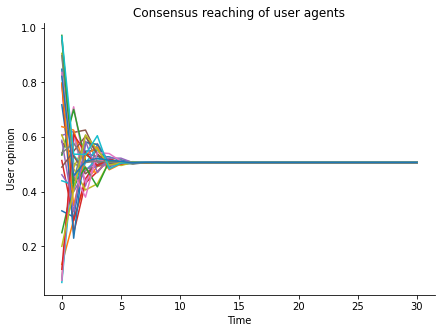

In [ ]:
fig = plt.figure(figsize=(7,5))
for i in range(len(df)):
    plt.plot(df[i])
plt.title("Consensus reaching of user agents")
plt.xlabel("Time")
plt.ylabel("User opinion")
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.show()